In [1]:
# Import all libraries needed for the tutorial
import pandas as pd
import numpy as np
from numpy import sum
import matplotlib.pyplot as plt
import sys # only needed to determine Python version number

# Enable incline plotting
%matplotlib inline

In [3]:
# wehne developing your example at first use a smaller data set then enlarge it oce things seem to be working. This will help iPython and Pandas to run faster
# years = range(1880,2015)
years = range (2000,2015)

# Your location may vary..
Location = r'C:\Users\GBTC441017ur\Desktop\names\\'

#Location = 'babynames/names/'  # on Mac and Unix use single /, on Windows use double \\

# create a Python list called pieces
pieces =[]
columns = ['name', 'sex', 'births']

for year in years:
    path = Location + 'yob%d.txt' % year
    # print(path) # remove the # at the beginning of this line t display the path to the file
    
    # create a dataframe from each file and read each file into the dataframe
    #because each file contains the data for one year each frame is for the year of the file
    
    frame = pd.read_csv(path, names = columns)
    
    # add the year column and append all the dataframes to the pieces list
    frame['year']= year
    pieces.append(frame)
    
# Concatenate everything into a single Dataframe
names = pd.concat(pieces, ignore_index = True)

# inspect your names Dataframe
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492895 entries, 0 to 492894
Data columns (total 4 columns):
name      492895 non-null object
sex       492895 non-null object
births    492895 non-null int64
year      492895 non-null int64
dtypes: int64(2), object(2)
memory usage: 15.0+ MB


In [4]:
# note: this differs from the example in the book (p. 34) to work with py3
total_births = names.pivot_table('births', index=['year'], columns ='sex', aggfunc = sum)

In [5]:
total_births.tail()

sex,F,M
year,,
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414
2013,1745339,1881463
2014,1768775,1901376


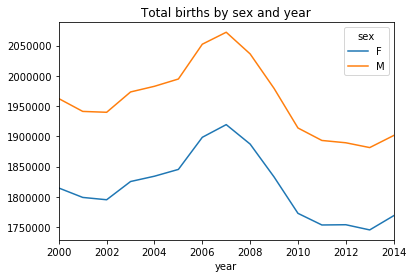

In [7]:
# see page 34 of the book
# create a column, prop, to hold the proportion of the babies given each name relative to the total births
total_births.plot(title = 'Total births by sex and year')

def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)
    
    group['prop'] = births/births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)